# Estimating $\pi$ with Monte Carlo method

This is a toy problem aimed to provide understanding on Monte Carlo method. 
We will randomly shoot inside the square and see what fraction of of shots land in the circle. We expect to derive $\pi$ based on the fraction of shots landing within the circle.

$\frac{\text{shots inside circle}}{\text{shots inside square}} = \frac{\text{area of circle}}{\text{area of square}} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4}$

We will choose $r=1$.

Let's plot the target...

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from tqdm.auto import tqdm

(-1.1, 1.1)

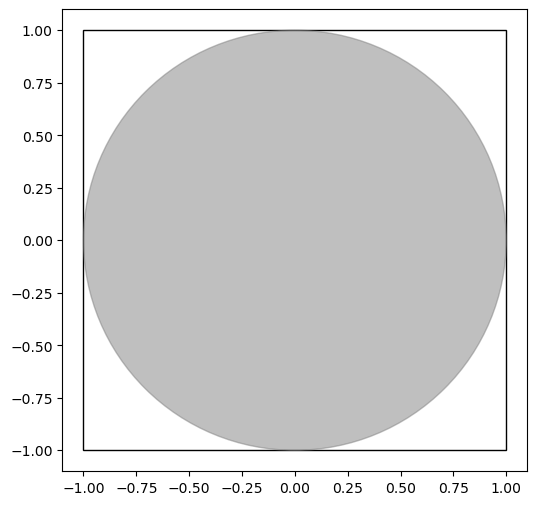

In [11]:
# Plot the square and the target-circle

circle = patches.Circle((0,0), radius = 1, 
                        fill = True, linestyle = "-", color = "gray", alpha = 0.5)
square = patches.Rectangle((-1,-1), width = 2, height = 2, fill = False)

fig, ax = plt.subplots(figsize = (6,6))
ax.add_patch(square)
ax.add_patch(circle)
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)


We will divide the problem into 3 stages:
1. Setup single experiment: draw a random point within the square and check if it's inside the circle
2. Repeat the experiment multiple times. 
3. Represent the result: 
    * Check if we will correctly estimate $\pi$
    * Plot the results
    
## Step 1: Single experiment

In [34]:
def select_random_point():
    """
    Draws a random point inside a square and checks if it's within the circle.
    
    Returns a tuple:
    [0] (x,y) - coordinates of the randomly chosen point
    [1] `0` if the point is outside the circle
        `1` if the point is inside the circle
    """
    # Randomly choose a point
    x, y = np.random.uniform(-1, 1, size = 2)
    
    # Check if these points are inside the circle
    r = np.sqrt(x**2 + y**2)
    if r > 1:
        is_inside = 0
    else:
        is_inside = 1
        
    return ((x,y), is_inside)

## Step 2: Repeat the single experiment multiple times

First, let's make the experiment for small number of samples to see if everything works.

In [44]:
def select_many_random_points(n):
    """
    Draws many random points and checks if they are within the circle.
    Returns 3 lists
    [0] x-coordinates of each point
    [1] y-coordinates of each point
    [2] list that checks if each point is inside the circle
    """

    # Setup list to collect point coordinates
    x_list = []
    y_list = []
    # Setup list to collect shots inside the circle
    is_inside_list = []
    
    for k in tqdm(range(n)):
        result = select_random_point()
        x, y = result[0]
        is_inside = result[1]
        
        x_list.append(x)
        y_list.append(y)
        is_inside_list.append(is_inside)
        
    return x_list, y_list, is_inside_list

In [65]:
# Get 50 points for sanity check
x_50, y_50, is_inside_50 = select_many_random_points(50)

  0%|          | 0/50 [00:00<?, ?it/s]

## Step 3: Plot the results and get $\pi$

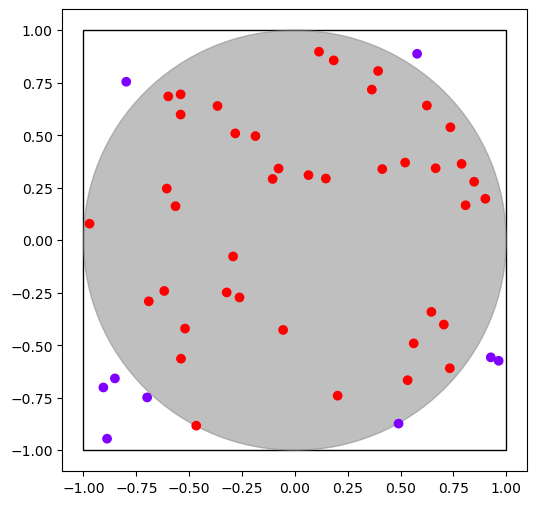

In [66]:
def plot_results(x_list, y_list, is_inside_list):
    """Plots the points from the x and y lists."""
    circle = patches.Circle((0,0), radius = 1, 
                        fill = True, linestyle = "-", color = "gray", alpha = 0.5)
    square = patches.Rectangle((-1,-1), width = 2, height = 2, fill = False)

    fig, ax = plt.subplots(figsize = (6,6))
    ax.add_patch(square)
    ax.add_patch(circle)
    ax.scatter(x_list, y_list, c = is_inside_list, cmap = "rainbow")
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    
plot_results(x_50, y_50, is_inside_50)

In [67]:
def get_pi(is_inside_list):
    return np.sum(is_inside_list)/len(is_inside_list)*4

In [68]:
print(f"Pi estimation with {len(is_inside_50)} points: {get_pi(is_inside_50)}")
print(f"Pi: {np.pi}")

Pi estimation with 50 points: 3.28
Pi: 3.141592653589793


## Let's repeat the experiment a lot of times

In [74]:
x_list, y_list, is_inside_list = select_many_random_points(10000000)

estimated_pi = get_pi(is_inside_list)
print(f"Pi estimation with {len(is_inside_list)} points: {estimated_pi}")
print(f"Pi: {np.pi}")
print(f"Differnece between np.pi and our result: {np.abs(np.pi - estimated_pi)}")

  0%|          | 0/10000000 [00:00<?, ?it/s]

Pi estimation with 10000000 points: 3.1413464
Pi: 3.141592653589793
Differnece between np.pi and our result: 0.0002462535897929108
